In [1]:
import numpy as np
from PIL import Image, ImageDraw
from acl_model import Model
import cv2
import sys
import os
from glob import glob
import matplotlib.pyplot as plt
import torch
import torchvision
import time

In [2]:
with open("data/coco.names") as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][1:]

In [3]:
device_id = 1
input_size = 640
model_path = "./model/modify_yolov5s_out.om"

In [4]:
model = Model(device_id, model_path, input_size, input_size)

[ACL] init resource stage:
[ACL] init resource stage success
[Model] class Model init resource stage:
[Model] create model output dataset:
[Model] create model output dataset success
model input size 1
input  0
model input dims ({'name': 'images', 'dimCount': 4, 'dims': [1, 12, 320, 320]}, 0)
model input datatype 0
model output size 3
output  0
model output dims ({'name': 'Reshape_259:0', 'dimCount': 5, 'dims': [1, 3, 85, 80, 80]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'Reshape_275:0', 'dimCount': 5, 'dims': [1, 3, 85, 40, 40]}, 0)
model output datatype 0
output  2
model output dims ({'name': 'Reshape_291:0', 'dimCount': 5, 'dims': [1, 3, 85, 20, 20]}, 0)
model output datatype 0
[Model] class Model init resource stage success


In [23]:
img_dict = {"path": "./data/person.jpg", "dtype": np.uint8}
img_org_bgr = cv2.imread(img_dict["path"])

In [24]:
%timeit -n 50 -r 10 
bboxes = model.run1(img_org_bgr)

image_np_expanded shape: (1, 12, 320, 320)
img_numpy shape: (1, 12, 320, 320)
111452016
img_buf_size 4915200
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success


In [25]:
img = Image.open(img_dict["path"])

In [26]:
img1 = ImageDraw.Draw(img)
for bbox in bboxes:
    img1.rectangle(list(bbox[:4]), outline ="red", width=2)
#     print(bbox[:4], bbox[4], bbox[5], coco_labels[int(bbox[5])])

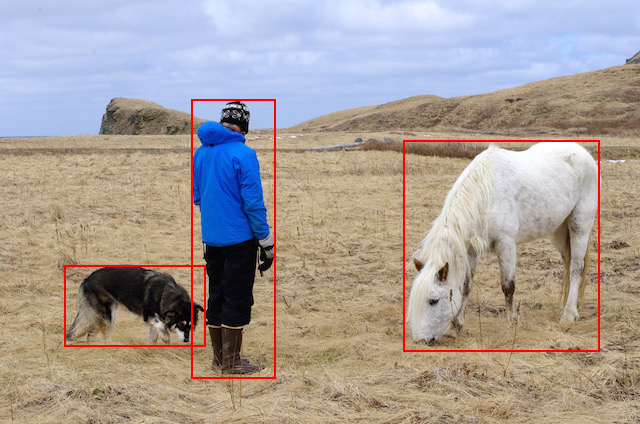

In [27]:
img